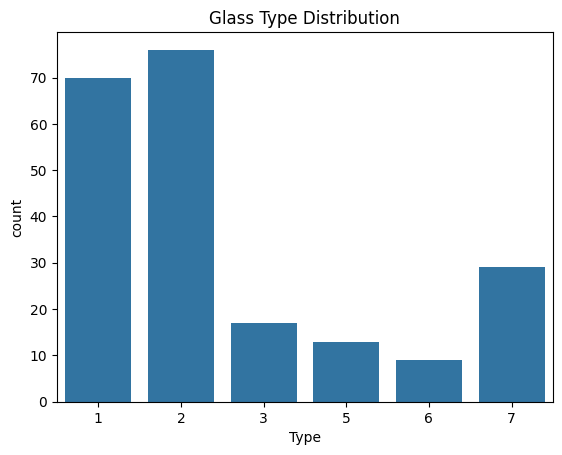

Accuracy: 0.8604651162790697


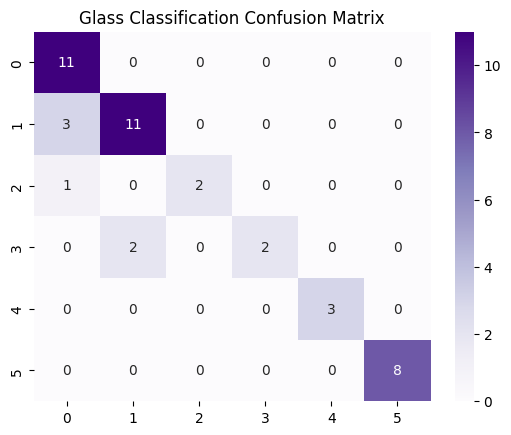

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Column names
columns = [
    "Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"
]

# Load data
df = pd.read_csv("glass.data", header=None, names=columns)

# Drop Id
df.drop("Id", axis=1, inplace=True)

# EDA
sns.countplot(x="Type", data=df)
plt.title("Glass Type Distribution")
plt.show()

# Features and target
X = df.drop("Type", axis=1)
y = df["Type"]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
rf = RandomForestClassifier(n_estimators=150, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))

sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Purples")
plt.title("Glass Classification Confusion Matrix")
plt.show()


/tmp/ipython-input-4130757902.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


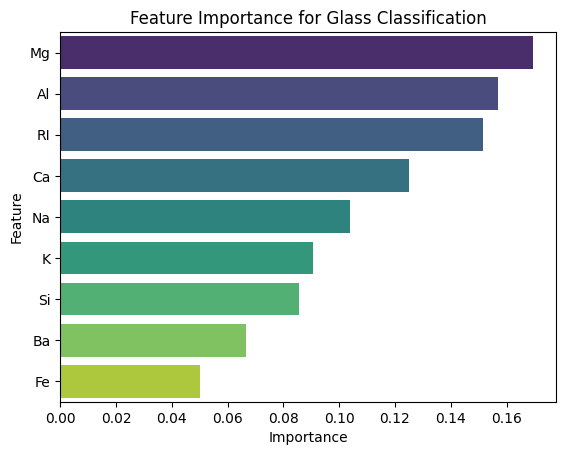

In [2]:
# ---------------- Feature Importance ----------------
importances = rf.feature_importances_
feature_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_df,
    palette="viridis"
)
plt.title("Feature Importance for Glass Classification")
plt.show()


In [3]:
# ---------------- GenAI-style Insight Generator ----------------
def generate_ai_insights(feature_df):
    insights = []

    top_features = feature_df.head(3)

    for _, row in top_features.iterrows():
        insights.append(
            f"The feature '{row['Feature']}' plays a significant role "
            f"in distinguishing different glass types."
        )

    summary = (
        "Based on model analysis, chemical composition strongly influences "
        "glass classification. Variations in mineral concentration help "
        "separate industrial, container, and building glass."
    )

    return insights, summary


insights, summary = generate_ai_insights(feature_df)

print("\n🔍 AI-Generated Insights:")
for i in insights:
    print("-", i)

print("\n📌 AI Summary:")
print(summary)



🔍 AI-Generated Insights:
- The feature 'Mg' plays a significant role in distinguishing different glass types.
- The feature 'Al' plays a significant role in distinguishing different glass types.
- The feature 'RI' plays a significant role in distinguishing different glass types.

📌 AI Summary:
Based on model analysis, chemical composition strongly influences glass classification. Variations in mineral concentration help separate industrial, container, and building glass.
